In [85]:
# import libraries
# MIT License

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# import scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import category_encoders as ce

from sklearn.model_selection import train_test_split

In [86]:
df = pd.read_csv('../data/clustered_data.csv')

In [87]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Repayment_Status_Sept', 'Repayment_Status_Aug', 'Repayment_Status_Jul',
       'Repayment_Status_Jun', 'Repayment_Status_May', 'Repayment_Status_Apr',
       'Bill_Amount_Sept', 'Bill_Amount_Aug', 'Bill_Amount_Jul',
       'Bill_Amount_Jun', 'Bill_Amount_May', 'Bill_Amount_Apr',
       'Pay_Amount_Sept', 'Pay_Amount_Aug', 'Pay_Amount_Jul', 'Pay_Amount_Jun',
       'Pay_Amount_May', 'Pay_Amount_Apr', 'Default_Payment',
       'limit_bal_cluster_k', 'Bill_Amount_Total', 'Pay_Amount_Total',
       'Bill_Amount_Average', 'bill_amount_average_cluster_k',
       'Pay_Amount_Average', 'pay_amount_average_cluster_k',
       'Repayment_Status_Total', 'Repayment_Status_Average',
       'repayment_status_average_cluster_k', 'age_cluster_k'],
      dtype='object')

In [88]:
reg_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'age_cluster_k']

In [89]:
def prepare_feature_target(df, feature_name, reg_features=None, classficy=True):
    if classficy:
        df_features = df.drop([feature_name], axis=1)
        df_target = df[feature_name]
    else:
        df_features = df[reg_features]
        df_target = df[feature_name]
    
    return df_features, df_target

In [90]:
def different_categories_numerical(df):
    categories = []
    numerical = []
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values <= 11:
            categories.append(column)
        else:
            numerical.append(column)
    return categories, numerical

def apply_binary_encoding(df, categorical_columns):
    # Initialize the Binary Encoder
    encoder = ce.BinaryEncoder(cols=categorical_columns)

    # Fit and transform the DataFrame
    df_encoded = encoder.fit_transform(df)

    return df_encoded

def prepare_data(df, feature_name, reg_features=None, classficy=True):
    df_features, df_target = prepare_feature_target(df, feature_name, reg_features, classficy)
    categories_featue, _ = different_categories_numerical(df_features)
    if classficy:
        df_encoded = apply_binary_encoding(df_features, categories_featue)
    else:
        df_encoded = df_features
        df_target = df_target
    return df_encoded, df_target

# Classification

In [91]:
df_encoded, df_target = prepare_data(df,"Default_Payment")
# save data
df_encoded.to_csv('../data/cls/cls_encoder.csv', index=False)
df_target.to_csv('../data/cls/cls_target.csv', index=False)

# Regression

In [92]:
def handle_outliers(df, col):
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 3 * IQR
    
    # Option 1: Remove outliers
    df_outliers_removed = df.loc[(df[col] >= lower_fence) & (df[col] <= upper_fence)]
    
    # Return the resulting DataFrame (choose one option)
    return df_outliers_removed  # or df_capped

In [93]:
# find limit balance that has less than 20 people
# remove the limit balance that has less than 20 people
df_removed = df_removed.groupby('LIMIT_BAL').filter(lambda x: len(x) > 30)
df_removed = handle_outliers(df_removed, 'LIMIT_BAL')

In [94]:
df_removed

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Total,Pay_Amount_Total,Bill_Amount_Average,bill_amount_average_cluster_k,Pay_Amount_Average,pay_amount_average_cluster_k,Repayment_Status_Total,Repayment_Status_Average,repayment_status_average_cluster_k,age_cluster_k
0,20000,2,3,1,24,2,2,-1,-1,-2,...,7704,689,1284.000000,2,114.833333,0,-2,-0.333333,7,2
1,120000,2,3,2,26,-1,2,0,0,0,...,17077,5000,2846.166667,2,833.333333,0,3,0.500000,5,2
2,90000,2,3,2,34,0,0,0,0,0,...,101653,11018,16942.166667,2,1836.333333,0,0,0.000000,0,0
3,50000,2,3,1,37,0,0,0,0,0,...,231334,8388,38555.666667,0,1398.000000,0,0,0.000000,0,6
4,50000,1,3,1,57,-1,0,-1,0,0,...,109339,59049,18223.166667,2,9841.500000,2,-2,-0.333333,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,2,1,39,0,0,0,0,0,...,725349,42550,120891.500000,4,7091.666667,2,0,0.000000,0,3
29996,150000,1,2,2,43,-1,-1,-1,-1,0,...,21182,14490,3530.333333,2,2415.000000,0,-4,-0.666667,7,8
29997,30000,1,3,2,37,4,3,2,-1,0,...,70496,31300,11749.333333,2,5216.666667,0,8,1.333333,6,6
29998,80000,1,2,1,41,1,-1,0,0,0,...,266611,147181,44435.166667,0,24530.166667,4,-1,-0.166667,0,3


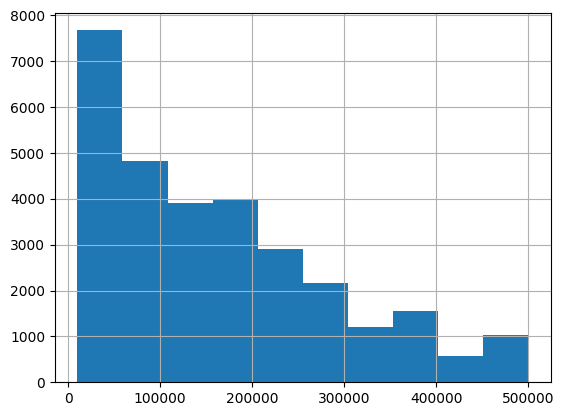

In [95]:
# find distribution of target
df_target = df_removed["LIMIT_BAL"]
# find distribution of target
df_target.hist()
plt.show()

In [96]:
df_encoded, df_target = prepare_data(df_removed, ['LIMIT_BAL', 'Default_Payment'], reg_features=reg_features, classficy=False)
df_encoded.to_csv('../data/reg/reg_encoder.csv', index=False)
df_target.to_csv('../data/reg/reg_target.csv', index=False)